In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling Libraries
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split

import warnings
warnings.filterwarnings('ignore')

In [29]:
df=pd.read_csv('kidney.csv')
df

,Age,Bp,Sg,Al,Su,Rbc,Pc,Pcc,Ba,Bgr,...,Pcv,Wbcc,Rbcc,Htn,Dm,Cad,Appet,pe,Ane,Class
0,48.0,80.0,1.020,1.0,0.0,0.81,1.0,0.0,0.0,121.00,...,44.0,7800.0,5.20,1.0,1,0.0,1.0,0.0,0.0,ckd
1,7.0,50.0,1.020,4.0,0.0,0.81,1.0,0.0,0.0,148.04,...,38.0,6000.0,4.71,0.0,0,0.0,1.0,0.0,0.0,ckd
2,62.0,80.0,1.010,2.0,3.0,1.00,1.0,0.0,0.0,423.00,...,31.0,7500.0,4.71,0.0,1,0.0,0.0,0.0,1.0,ckd
3,48.0,70.0,1.005,4.0,0.0,1.00,0.0,1.0,0.0,117.00,...,32.0,6700.0,3.90,1.0,0,0.0,0.0,1.0,1.0,ckd
4,51.0,80.0,1.010,2.0,0.0,1.00,1.0,0.0,0.0,106.00,...,35.0,7300.0,4.60,0.0,0,0.0,1.0,0.0,0.0,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.00,1.0,0.0,0.0,140.00,...,47.0,6700.0,4.90,0.0,0,0.0,1.0,0.0,0.0,notckd
396,42.0,70.0,1.025,0.0,0.0,1.00,1.0,0.0,0.0,75.00,...,54.0,7800.0,6.20,0.0,0,0.0,1.0,0.0,0.0,notckd
397,12.0,80.0,1.020,0.0,0.0,1.00,1.0,0.0,0.0,100.00,...,49.0,6600.0,5.40,0.0,0,0.0,1.0,0.0,0.0,notckd
398,17.0,60.0,1.025,0.0,0.0,1.00,1.0,0.0,0.0,114.00,...,51.0,7200.0,5.90,0.0,0,0.0,1.0,0.0,0.0,notckd


In [58]:
df.iloc[395]['Hemo']

15.7

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     400 non-null    float64
 1   Bp      400 non-null    float64
 2   Sg      400 non-null    float64
 3   Al      400 non-null    float64
 4   Su      400 non-null    float64
 5   Rbc     400 non-null    float64
 6   Pc      400 non-null    float64
 7   Pcc     400 non-null    float64
 8   Ba      400 non-null    float64
 9   Bgr     400 non-null    float64
 10  Bu      400 non-null    float64
 11  Sc      400 non-null    float64
 12  Sod     400 non-null    float64
 13  Pot     400 non-null    float64
 14  Hemo    400 non-null    float64
 15  Pcv     400 non-null    float64
 16  Wbcc    400 non-null    float64
 17  Rbcc    400 non-null    float64
 18  Htn     400 non-null    float64
 19  Dm      400 non-null    int64  
 20  Cad     400 non-null    float64
 21  Appet   400 non-null    float64
 22  pe

In [31]:
df.isnull().sum()

Age      0
Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Pc       0
Pcc      0
Ba       0
Bgr      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Pcv      0
Wbcc     0
Rbcc     0
Htn      0
Dm       0
Cad      0
Appet    0
pe       0
Ane      0
Class    0
dtype: int64

In [32]:
df['Class'].value_counts()

ckd       250
notckd    150
Name: Class, dtype: int64

In [33]:
df['Class'] = df['Class'].apply({'notckd':0,'ckd':1}.get)

In [34]:
df['Class'].value_counts()

1    250
0    150
Name: Class, dtype: int64

In [35]:
df.describe()

,Age,Bp,Sg,Al,Su,Rbc,Pc,Pcc,Ba,Bgr,...,Pcv,Wbcc,Rbcc,Htn,Dm,Cad,Appet,pe,Ane,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483300,76.469100,1.017712,1.017300,0.450125,0.810300,0.772625,0.106100,0.055600,148.036900,...,38.883700,8406.121800,4.708275,0.369350,0.34250,0.085450,0.794475,0.190475,0.150375,0.625000
std,16.974966,13.476298,0.005434,1.272318,1.029487,0.308983,0.383751,0.306756,0.228199,74.782634,...,8.151082,2523.219976,0.840315,0.482023,0.47514,0.279166,0.404077,0.392677,0.357440,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,0.810000,0.770000,0.000000,0.000000,101.000000,...,34.000000,6975.000000,4.500000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,78.235000,1.020000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,126.000000,...,38.880000,8406.120000,4.710000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.000000,80.000000,1.020000,2.000000,0.450000,1.000000,1.000000,0.000000,0.000000,150.000000,...,44.000000,9400.000000,5.100000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
list(df.columns)[:-1]

['Age',
 'Bp',
 'Sg',
 'Al',
 'Su',
 'Rbc',
 'Pc',
 'Pcc',
 'Ba',
 'Bgr',
 'Bu',
 'Sc',
 'Sod',
 'Pot',
 'Hemo',
 'Pcv',
 'Wbcc',
 'Rbcc',
 'Htn',
 'Dm',
 'Cad',
 'Appet',
 'pe',
 'Ane']

In [37]:
'''for col in df.columns:
    if col in list(df.columns)[:-1]:
        upper_limit = df[col].mean() + 3*df[col].std()
        lower_limit = df[col].mean() - 3*df[col].std()
        df[col] = np.where(df[col]>upper_limit,upper_limit,np.where(df[col]<lower_limit,lower_limit,df[col]))'''
        

'for col in df.columns:\n    if col in list(df.columns)[:-1]:\n        upper_limit = df[col].mean() + 3*df[col].std()\n        lower_limit = df[col].mean() - 3*df[col].std()\n        df[col] = np.where(df[col]>upper_limit,upper_limit,np.where(df[col]<lower_limit,lower_limit,df[col]))'

In [38]:
df.describe()

,Age,Bp,Sg,Al,Su,Rbc,Pc,Pcc,Ba,Bgr,...,Pcv,Wbcc,Rbcc,Htn,Dm,Cad,Appet,pe,Ane,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483300,76.469100,1.017712,1.017300,0.450125,0.810300,0.772625,0.106100,0.055600,148.036900,...,38.883700,8406.121800,4.708275,0.369350,0.34250,0.085450,0.794475,0.190475,0.150375,0.625000
std,16.974966,13.476298,0.005434,1.272318,1.029487,0.308983,0.383751,0.306756,0.228199,74.782634,...,8.151082,2523.219976,0.840315,0.482023,0.47514,0.279166,0.404077,0.392677,0.357440,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,0.810000,0.770000,0.000000,0.000000,101.000000,...,34.000000,6975.000000,4.500000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,78.235000,1.020000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,126.000000,...,38.880000,8406.120000,4.710000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.000000,80.000000,1.020000,2.000000,0.450000,1.000000,1.000000,0.000000,0.000000,150.000000,...,44.000000,9400.000000,5.100000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
X = df.iloc[:, [0,1,2,3, 4, 5,6, 7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]].values
Y = df.iloc[:, 24].values

In [40]:
X.shape,Y.shape

((400, 24), (400,))

In [41]:
'''from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(random_state=10)
X_res,y_res=os.fit_resample(X,Y)
print(type(y_res))'''

'from imblearn.over_sampling import RandomOverSampler\nos=RandomOverSampler(random_state=10)\nX_res,y_res=os.fit_resample(X,Y)\nprint(type(y_res))'

In [42]:
X_res.shape,y_res.shape

NameError: name 'X_res' is not defined

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.00469673 0.01043291 0.12932417 0.0841569  0.01325339 0.09043608
 0.04667481 0.00364277 0.00309711 0.02182773 0.01101047 0.01446764
 0.00954746 0.00376903 0.10627546 0.0798121  0.00507005 0.0445127
 0.11788459 0.10721284 0.00239197 0.05010517 0.02789037 0.01250755]


In [44]:
feature_importance = pd.DataFrame(model.feature_importances_)
lst=list(feature_importance.sort_values(0,ascending=False).head(10).index)
lst.sort()
lst

[2, 3, 5, 6, 14, 15, 17, 18, 19, 21]

In [45]:
x = X[:,lst]

In [54]:
for i in lst:
    print(df.columns[i])
    print(df[df.columns[i]].value_counts())

Sg
1.020    153
1.010     84
1.025     81
1.015     75
1.005      7
Name: Sg, dtype: int64
Al
0.00    199
1.02     46
1.00     44
2.00     43
3.00     43
4.00     24
5.00      1
Name: Al, dtype: int64
Rbc
1.00    201
0.81    152
0.00     47
Name: Rbc, dtype: int64
Pc
1.00    259
0.00     76
0.77     65
Name: Pc, dtype: int64
Hemo
12.53    52
15.00    16
10.90     8
9.80      7
13.00     7
         ..
7.50      1
5.80      1
6.80      1
8.20      1
10.60     1
Name: Hemo, Length: 116, dtype: int64
Pcv
38.88    71
41.00    21
52.00    21
44.00    19
48.00    19
40.00    16
43.00    15
42.00    13
45.00    13
50.00    12
33.00    12
28.00    12
32.00    12
36.00    12
34.00    11
37.00    11
46.00     9
30.00     9
29.00     9
35.00     9
31.00     8
24.00     7
39.00     7
26.00     6
38.00     5
51.00     4
47.00     4
53.00     4
49.00     4
54.00     4
22.00     3
25.00     3
27.00     3
23.00     2
19.00     2
14.00     1
17.00     1
16.00     1
9.00      1
20.00     1
18.00     1
21

In [47]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.20, random_state = 42)

In [48]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (320, 10)
X_test shape: (80, 10)
Y_train shape: (320,)
Y_test shape: (80,)


In [49]:
def evaluate_model(models):
   
    result_train = []
    result_test = []
    for model in models :
        trained_model = model.fit(X_train, Y_train)
        Y_pred = trained_model.predict(X_test)
        accuracy_test = accuracy_score(Y_test, Y_pred)
        accuracy_train = accuracy_score(Y_train, trained_model.predict(X_train))
        result_train.append(accuracy_train*100)
        result_test.append(accuracy_test*100)
        

    result_df = pd.DataFrame({
        "Accuracy Training Set":result_train,
        "Accuracy Testing Set":result_test,
        "Models":[
            "Logistic Regression",
            "Decision Tree Classifier",
            "AdaBoost Classifier",
            "Support Vector Machine",
            "Random Forest Classifier",
            "Gradient Boosting Classifier",
            "XGBoost",
            "Naive Bayes",
            "K-Nearest Neighbors Classifier",
            "LightGBM"
        ]
    })

    # Generate chart
    bar = sns.barplot(x = "Accuracy Testing Set", y = "Models", data = result_df, orient = "h",order=result_df.sort_values('Accuracy Testing Set',ascending = False).Models.head())
    bar.set_xlabel("Mean Accuracy")
    bar.set_title("Accuracy Scores")
    return result_df.sort_values('Accuracy Testing Set',ascending = False)

[20:39:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Accuracy Training Set,Accuracy Testing Set,Models
1,100.0000,100.00,Decision Tree Classifier
4,100.0000,100.00,Random Forest Classifier
5,100.0000,100.00,Gradient Boosting Classifier
9,100.0000,100.00,LightGBM
0,97.8125,98.75,Logistic Regression
6,100.0000,98.75,XGBoost
2,100.0000,97.50,AdaBoost Classifier
8,96.5625,97.50,K-Nearest Neighbors Classifier
3,93.1250,95.00,Support Vector Machine
7,94.6875,93.75,Naive Bayes


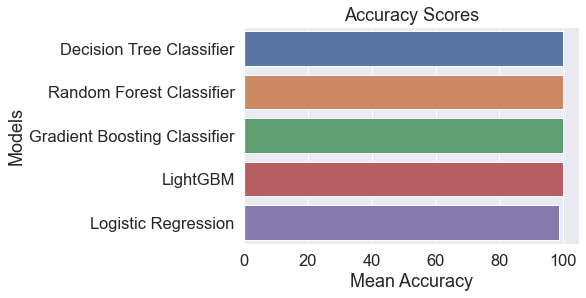

In [50]:
# Modeling step Test differents algorithms 
random_state = 30
models = [
    LogisticRegression(random_state = random_state),
    DecisionTreeClassifier(max_depth=5,random_state = random_state),
    AdaBoostClassifier(n_estimators=50,learning_rate=1),
    SVC(random_state = 0),
    RandomForestClassifier(random_state = random_state),
    GradientBoostingClassifier(random_state = random_state),
    XGBClassifier(),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=3),
    lgb.LGBMClassifier()
]
evaluate_model(models)

Accuracy: 98.75%


Text(16.5, 0.5, 'Predicted Label')

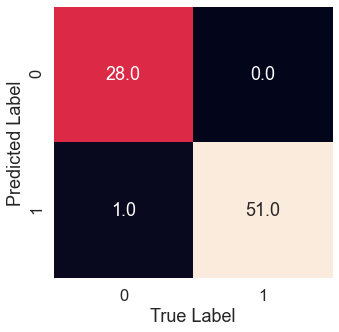

In [62]:
# Define models and parameters for RandomForestClassifier
model =  LogisticRegression(random_state = 30)


rfc = model.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: " + str(round((accuracy * 100),2))+"%")


sns.set(font_scale=1.5)
fig,ax=plt.subplots(figsize=(5,5))
ax=sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,cbar=False,fmt=".1f")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

In [63]:
rfc

LogisticRegression(random_state=30)

In [64]:
import pickle
pickle.dump(rfc,open(r'C:\Users\antar\PycharmProjects\HealthCareSystem\Kidney.pkl','wb'))

In [135]:
input_data = (70.0,90.0,1.015,0.0,0.0,0.81,1.0,0.0,0.0,144.0,125.0,4.0,136.0,4.6,12.0,37.0,8200.0,4.5,1.0,1,0.0,0.0,1.0,0.0)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
#std_data = sc.transform(input_data_reshaped)

prediction = rfc.predict(input_data_reshaped)

if (prediction[0] == 'notckd'):
    print('The person is not CKD')
else:
    print('The person is CKD')

ValueError: X has 24 features, but DecisionTreeClassifier is expecting 6 features as input.

In [ ]:
input_data=(55.0,70.0,1.02,0.0,0.0,1.0,1.0,0.0,0.0,107.0,26.0,1.1,137.53,4.63,17.0,50.0,6700.0,6.1,0.0,0,0.0,1.0,0.0,0.0)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
#std_data = sc.transform(input_data_reshaped)

prediction = rfc.predict(input_data_reshaped)

if (prediction[0] == 'notckd'):
    print('The person is not CKD')
else:
    print('The person is CKD')